## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Preprocessing & EDA

In [4]:
file_path = '/content/drive/MyDrive/AI_in_Industry/complete_dataset.xlsx'
df = pd.read_excel(file_path)

In [8]:
df.shape

(8624, 26)

In [9]:
df.head()

,timeDuration,nMovements,movementsDifficulty,robotSpeech,acrobaticMovements,movementsRepetition,musicGenre,movementsTransitionsDuration,humanMovements,balance,...,handsMovement,legsMovement,feetMovement,EvaluationChoreographyStoryTelling,EvaluationChoreographyRhythm,EvaluationChoreographyMovementTechnique,EvaluationChoreographyPublicInvolvement,EvaluationChoreographySpaceUse,EvaluationChoreographyHumanCharacterization,EvaluationChoreographyHumanReproducibility
0,140,20,2,0,2,1,folk,1,2,1,...,1,2,2,2,2,2,1,2,2,3
1,115,21,2,0,3,1,folk,2,3,2,...,2,3,2,3,3,3,3,3,3,2
2,110,20,2,0,3,2,folk,2,3,2,...,2,3,2,1,1,1,1,1,1,1
3,100,19,1,0,1,1,electronic,1,1,1,...,1,2,1,1,2,2,2,2,2,2
4,125,20,3,0,3,2,electronic,2,3,3,...,2,3,2,1,1,1,1,1,1,3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8624 entries, 0 to 8623
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   timeDuration                                 8624 non-null   int64 
 1   nMovements                                   8624 non-null   int64 
 2   movementsDifficulty                          8624 non-null   int64 
 3   robotSpeech                                  8624 non-null   int64 
 4   acrobaticMovements                           8624 non-null   int64 
 5   movementsRepetition                          8624 non-null   int64 
 6   musicGenre                                   8624 non-null   object
 7   movementsTransitionsDuration                 8624 non-null   int64 
 8   humanMovements                               8624 non-null   int64 
 9   balance                                      8624 non-null   int64 
 10  speed       

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timeDuration,8624.0,120.932050,66.224009,70.0,105.0,115.0,127.0,1132.0
nMovements,8624.0,17.420686,3.412798,8.0,15.0,18.0,20.0,24.0
movementsDifficulty,8624.0,1.962778,0.795663,1.0,1.0,2.0,3.0,3.0
robotSpeech,8624.0,0.485506,0.499819,0.0,0.0,0.0,1.0,1.0
acrobaticMovements,8624.0,1.900510,0.832111,1.0,1.0,2.0,3.0,3.0
movementsRepetition,8624.0,2.006841,0.812790,1.0,1.0,2.0,3.0,3.0
movementsTransitionsDuration,8624.0,1.735622,0.718634,1.0,1.0,2.0,2.0,3.0
humanMovements,8624.0,2.046266,0.826651,1.0,1.0,2.0,3.0,3.0
balance,8624.0,2.006841,0.824407,1.0,1.0,2.0,3.0,3.0
speed,8624.0,1.953618,0.807842,1.0,1.0,2.0,3.0,3.0


In [14]:
df['musicGenre'] = df['musicGenre'].str.lower().str.strip()

In [20]:
ordinal_cols = [
    'movementsDifficulty','acrobaticMovements','movementsRepetition',
    'humanMovements','balance','speed','bodyPartsCombination',
    'headMovement','armsMovement','handsMovement','legsMovement','feetMovement'
]

for col in ordinal_cols:
    counts = df[col].value_counts().sort_index()
    counts_str = ", ".join(f"{level}: {count}" for level, count in counts.items())
    print(f"{col} value counts\n{counts_str}\n")

movementsDifficulty value counts
1: 2896, 2: 3153, 3: 2575

acrobaticMovements value counts
1: 3457, 2: 2568, 3: 2599

movementsRepetition value counts
1: 2819, 2: 2927, 3: 2878

humanMovements value counts
1: 2756, 2: 2713, 3: 3155

balance value counts
1: 2901, 2: 2763, 3: 2960

speed value counts
1: 3023, 2: 2978, 3: 2623

bodyPartsCombination value counts
1: 2776, 2: 2821, 3: 3027

headMovement value counts
1: 3007, 2: 2725, 3: 2892

armsMovement value counts
1: 2657, 2: 2678, 3: 3289

handsMovement value counts
1: 2872, 2: 3222, 3: 2530

legsMovement value counts
1: 2717, 2: 2779, 3: 3128

feetMovement value counts
1: 3079, 2: 3129, 3: 2416



In [22]:
df = df.drop_duplicates()

In [23]:
df = pd.get_dummies(df, columns=['musicGenre'], dtype=int, drop_first=True)

In [29]:
genre_cols = [c for c in df.columns if c.startswith('musicGenre_')]
print("Music-genre dummy columns:", genre_cols)
print(df[genre_cols].sum().sort_values(ascending=False))

Music-genre dummy columns: ['musicGenre_electronic', 'musicGenre_folk', 'musicGenre_indie', 'musicGenre_latin', 'musicGenre_pop', 'musicGenre_rap', 'musicGenre_rock']
musicGenre_folk          1590
musicGenre_electronic    1546
musicGenre_rock          1524
musicGenre_pop            914
musicGenre_latin          845
musicGenre_indie          630
musicGenre_rap            629
dtype: int64


In [30]:
clean_path = '/content/drive/MyDrive/AI_in_Industry/cleaned_choreographies.csv'
df.to_csv(clean_path, index=False)
print("Cleaned data saved to:", clean_path)

Cleaned data saved to: /content/drive/MyDrive/AI_in_Industry/cleaned_choreographies.csv


In [31]:
print("\nShape after preprocessing:", df.shape)


Shape after preprocessing: (8563, 32)


In [62]:
target_cols = [
    'EvaluationChoreographyStoryTelling',
    'EvaluationChoreographyRhythm',
    'EvaluationChoreographyMovementTechnique',
    'EvaluationChoreographyPublicInvolvement',
    'EvaluationChoreographySpaceUse',
    'EvaluationChoreographyHumanCharacterization',
    'EvaluationChoreographyHumanReproducibility'
]

numeric_cols = [c for c in df.columns
                if c not in genre_cols + target_cols]

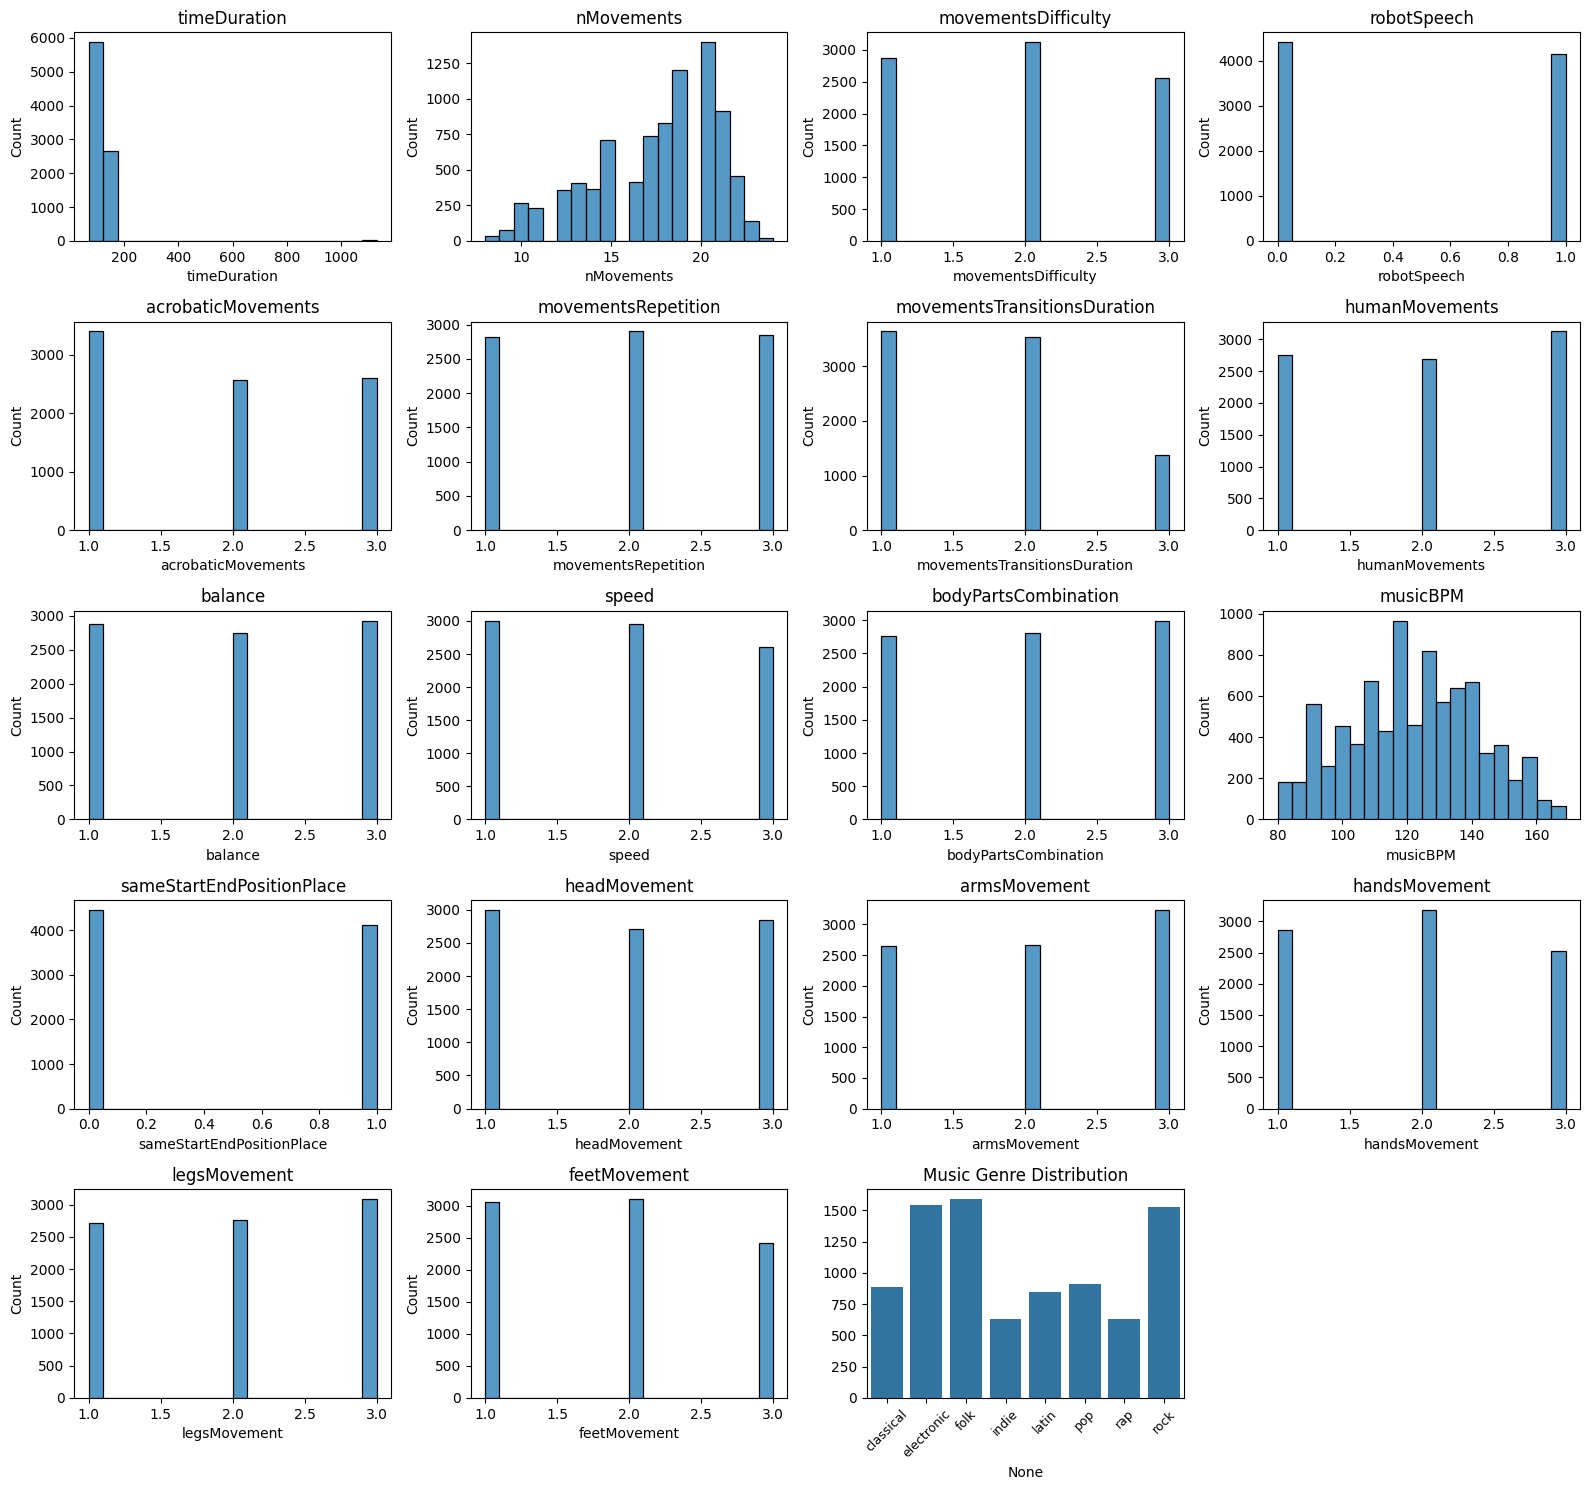

In [57]:
# ──  Univariate HISTOGRAMS + Genre Bar ─────────────────────────
baseline_count = (df[genre_cols].sum(axis=1) == 0).sum()
genre_counts = pd.Series(
    [baseline_count] + df[genre_cols].sum().tolist(),
    index=['classical'] + genre_cols
)

total_plots = len(numeric_cols) + 1  # +1 for the genre bar
ncols = 4
nrows = math.ceil(total_plots / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    sns.histplot(df[col], bins=20, ax=ax, kde=False)
    ax.set_title(col)

ax = axes[len(numeric_cols)]
sns.barplot(
    x=genre_counts.index.str.replace('musicGenre_',''),
    y=genre_counts.values,
    ax=ax
)
ax.tick_params(axis='x', rotation=45, labelsize=9)
ax.set_title("Music Genre Distribution")

for ax in axes[total_plots:]:
    fig.delaxes(ax)

fig.tight_layout();

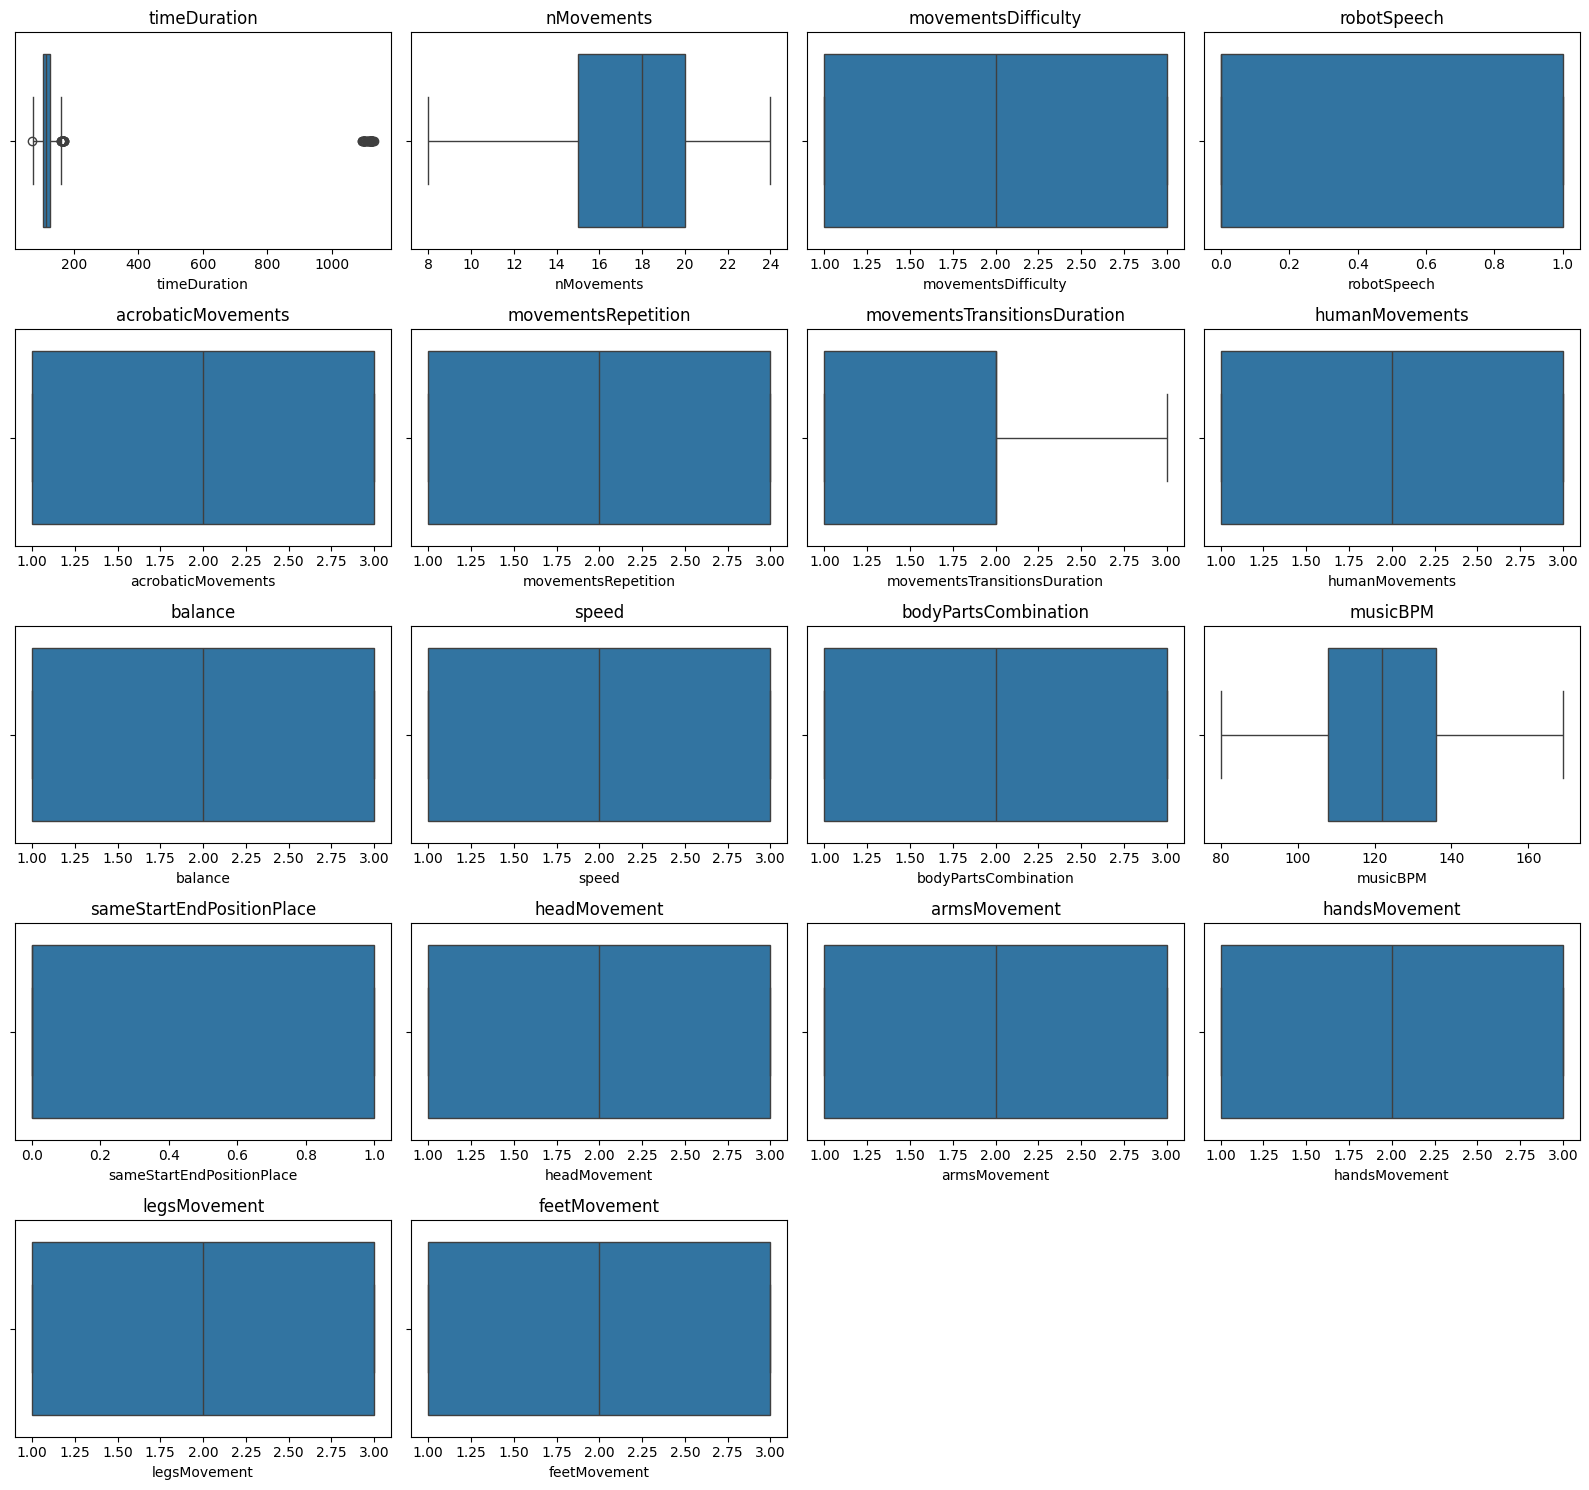

In [59]:
# ── Univariate BOXPLOTS ───────────────────────────
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)

for ax in axes[total_plots-1:]:
    fig.delaxes(ax)

fig.tight_layout()

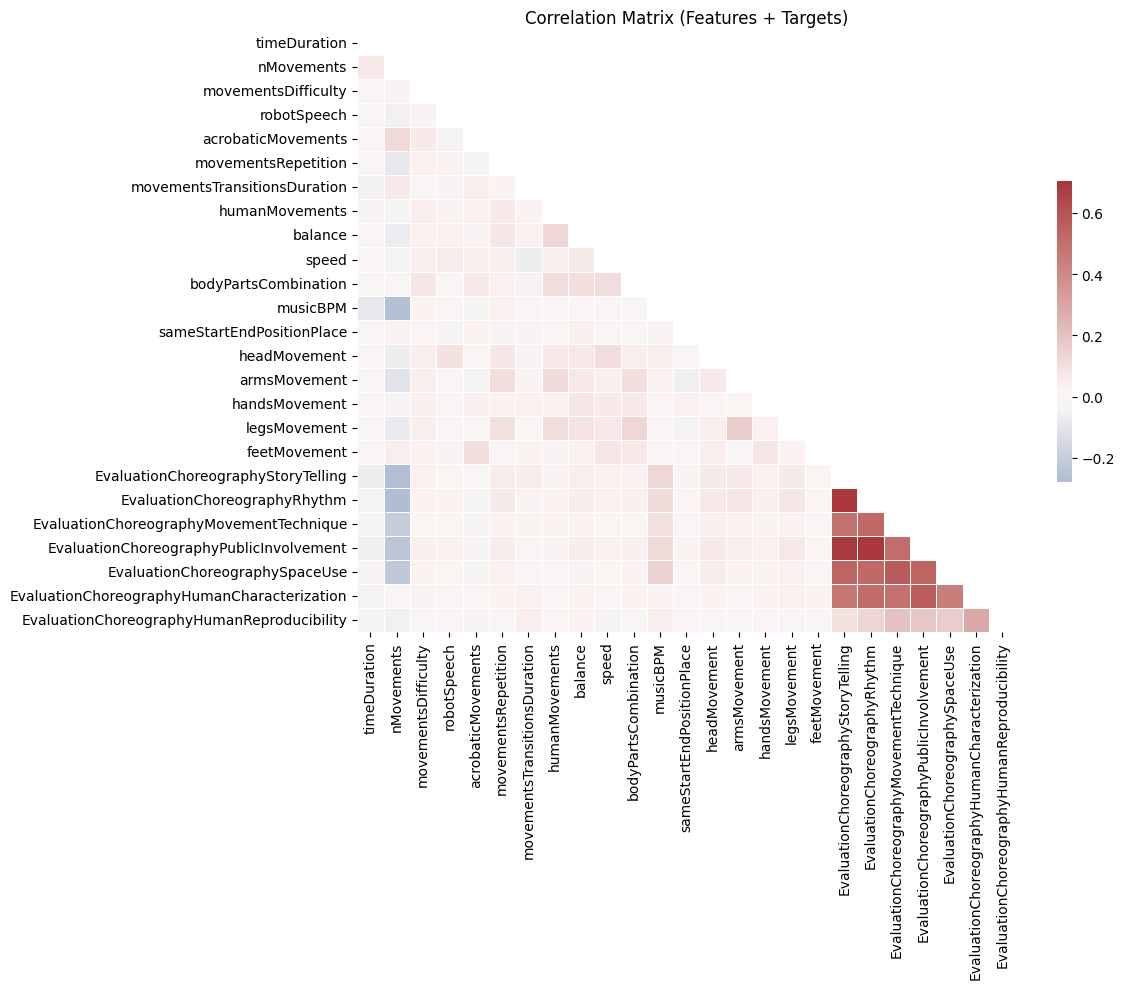

In [60]:
# ── Correlation Matrix ────────────────────────────────────────────────────
corr = df[numeric_cols + target_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(
    corr, mask=mask, cmap='vlag', center=0,
    linewidths=0.5, cbar_kws={'shrink':0.5}
)
plt.title("Correlation Matrix (Features + Targets)")
plt.tight_layout()

In [63]:
feature_cols = [
    'timeDuration','nMovements','movementsDifficulty','robotSpeech',
    'acrobaticMovements','movementsRepetition', 'movementsTransitionsDuration','humanMovements','balance',
    'speed','bodyPartsCombination','musicBPM','sameStartEndPositionPlace',
    'headMovement','armsMovement','handsMovement','legsMovement','feetMovement'
]
feature_cols += genre_cols

In [64]:
# Create a dict of per-target DataFrames
datasets = {}
for tgt in target_cols:
    datasets[tgt] = df[feature_cols + [tgt]].copy()

for tgt, d in datasets.items():
    print(f"{tgt}: {d.shape[0]} rows, {d.shape[1]} cols")

EvaluationChoreographyStoryTelling: 8563 rows, 26 cols
EvaluationChoreographyRhythm: 8563 rows, 26 cols
EvaluationChoreographyMovementTechnique: 8563 rows, 26 cols
EvaluationChoreographyPublicInvolvement: 8563 rows, 26 cols
EvaluationChoreographySpaceUse: 8563 rows, 26 cols
EvaluationChoreographyHumanCharacterization: 8563 rows, 26 cols
EvaluationChoreographyHumanReproducibility: 8563 rows, 26 cols
